# Plant Disease Detection

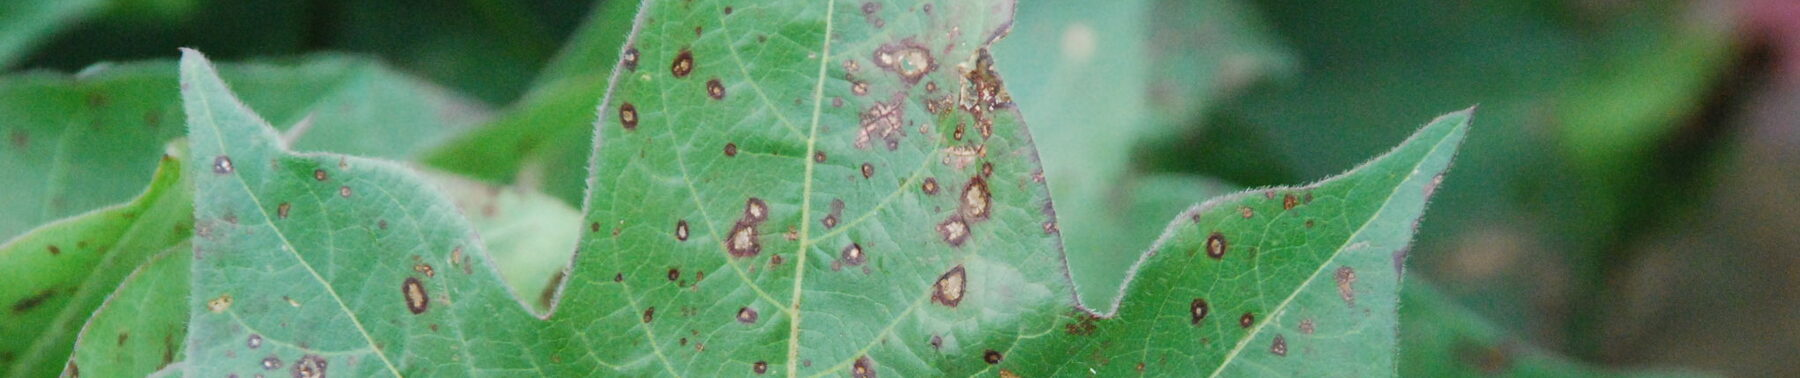

# Importing Libraries

In [3]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
#from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [4]:
# Train Data Loading and Exploring

In [5]:
data_dir = "C:\Users\avira\Final_Project\Mix_Plant\archive\New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "\train"
valid_dir = data_dir + "\valid"
diseases = os.listdir(train_dir)

In [6]:
diseases

['Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy'

In [7]:
# show number of total classes 
print("Number of classes : " ,len(diseases))

Number of classes :  38


In [8]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_val[disease] = len(os.listdir(valid_dir + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
Tomato___Late_blight                                         1851
Tomato___healthy                                             1926
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Potato___healthy                                             1824
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Early_blight                                        1920
Tomato___Septoria_leaf_spot                                  1745
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Strawberry___Leaf_scorch                                     1774
Peach___healthy                                              1728
Apple___Apple_scab                                           2016
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Bacterial_spot                                      1702
Apple___Black_rot                                            1987
Blueberry___healthy                                          1816
Cherry_(including_sour)___Powdery_mildew                     1683
Peach___Bacterial_spot                                       1838
Apple___Cedar_apple_rust                                     1760
Tomato___Target_Spot                                         1827
Pepper,_bell___healthy                                       1988
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Potato___Late_blight                                         1939
Tomato___Tomato_mosaic_virus                                 1790
Strawberry___healthy                                         1824
Apple___healthy                                              2008
Grape___Black_rot                                            1888
Potato___Early_blight                                        1939
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Common_rust_                                  1907
Grape___Esca_(Black_Measles)                                 1920
Raspberry___healthy                                          1781
Tomato___Leaf_Mold                                           1882
Tomato___Spider_mites Two-spotted_spider_mite                1741
Pepper,_bell___Bacterial_spot                                1913
Corn_(maize)___healthy                                       1859

<AxesSubplot:title={'center':'Train data distribution '}, xlabel='Number of image', ylabel='Planet'>

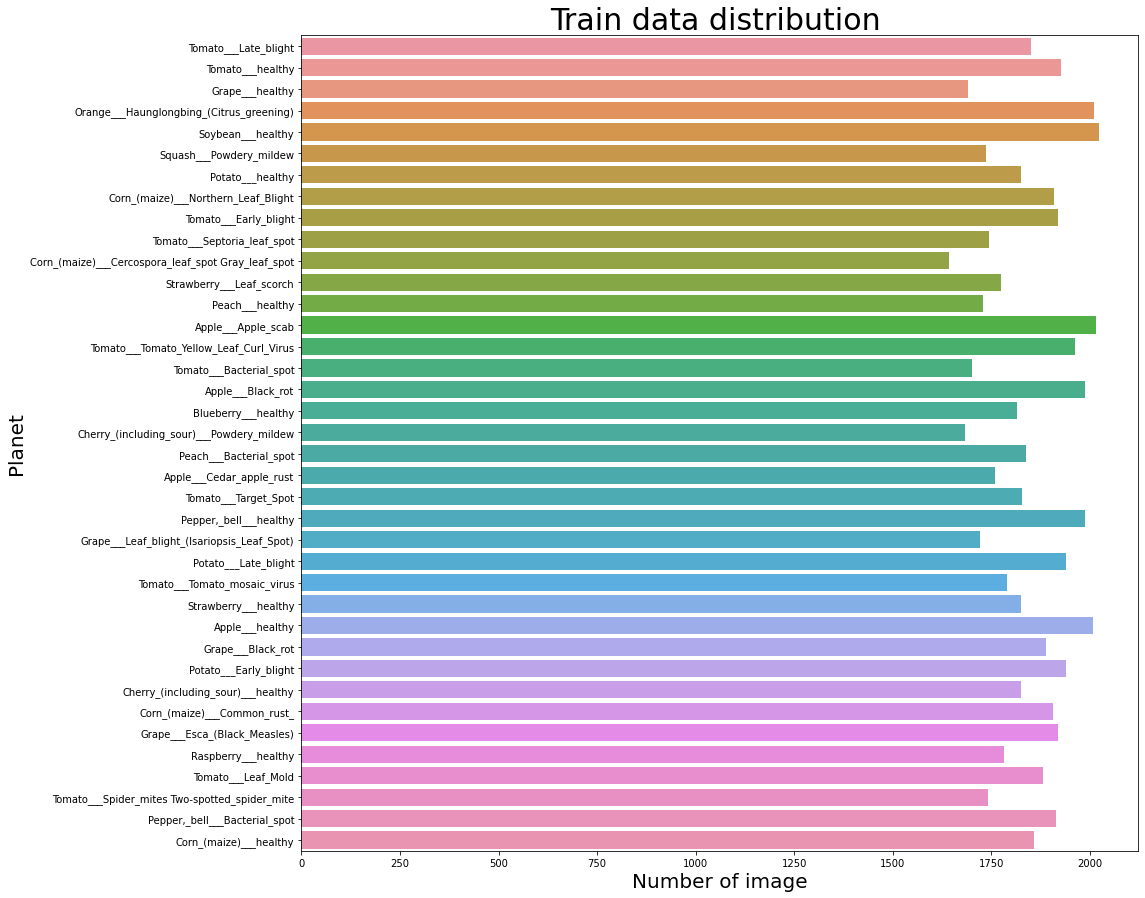

In [9]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)


In [10]:
# show number of images in train data
number_train = 0
for value in nums_train.values():
    number_train += value
print("The number of images for training : ",number_train)


The number of images for training :  70295


In [11]:
plants=[]
diseases_unique=[]
for i in diseases:
  if(i.split('__'))[0] not in plants:
    plants.append(i.split('__')[0])
  if(i.split('___'))[1] != 'healthy':
    diseases_unique.append(i.split('___')[1])

In [12]:
# show names and number of plants
# Names
print('Plantes :',plants)
# Number of platns:
print('-'*100)
print('Number of plants : ',len(plants))

Plantes : ['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [16]:
# show names and number of unique diseases
# Names
print('diseases :',diseases_unique)
# Number of unique diseases:
print('-'*100)
print('Number of unique diseases : ',len(diseases_unique))

diseases : ['Late_blight', 'Haunglongbing_(Citrus_greening)', 'Powdery_mildew', 'Northern_Leaf_Blight', 'Early_blight', 'Septoria_leaf_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Leaf_scorch', 'Apple_scab', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Black_rot', 'Powdery_mildew', 'Bacterial_spot', 'Cedar_apple_rust', 'Target_Spot', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Late_blight', 'Tomato_mosaic_virus', 'Black_rot', 'Early_blight', 'Common_rust_', 'Esca_(Black_Measles)', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite', 'Bacterial_spot']
----------------------------------------------------------------------------------------------------
Number of unique diseases :  26


### Distribution plants for each disease 

In [17]:
def create_data_frame(path):
    list_plant=[]
    list_category=[]
    list_disease=[]
    list_path=[]
    list_plant_category=[]
    list_image_size=[]
    list_image_type=[]
    list_size=[]
    
    for path,directory,files in os.walk(path,topdown=False):
        for name in files:
            plant_category=category=path.split("/")[-1]
            plant=plant_category.split("___")[0]
            category=plant_category.split("___")[-1]
            disease=0 if category=="healthy" else 1
            full_path=path+"/"+name
            image_type=name.split(".")[1]
            size=os.path.getsize(full_path)
            with Image.open(full_path) as images:
                width,height=images.size
            list_plant.append(plant)
            list_category.append(category)
            list_disease.append(disease)
            list_path.append(full_path)
            list_plant_category.append(plant_category)
            list_image_size.append(str(width)+"x"+str(height))
            list_image_type.append(image_type)
            list_size.append(size)                                  
    data_info=pd.DataFrame.from_dict({"Plant":list_plant,"Category":list_category,"Disease":list_disease,
                           "Path":list_path,"Plant_Category":list_plant_category,"Image_size":list_image_size,"Image_type":list_image_type,"Size":list_size},orient="columns")

    image_count_info=pd.DataFrame(data_info.groupby(["Plant","Category","Plant_Category"]).size())
    image_count_info.rename(columns={0:"nb"},inplace=True)
    image_count_info=image_count_info.reset_index()
    return data_info,image_count_info

train_data_info,train_data_count=create_data_frame(train_dir)
valid_data_info,valid_data_count=create_data_frame(valid_dir)

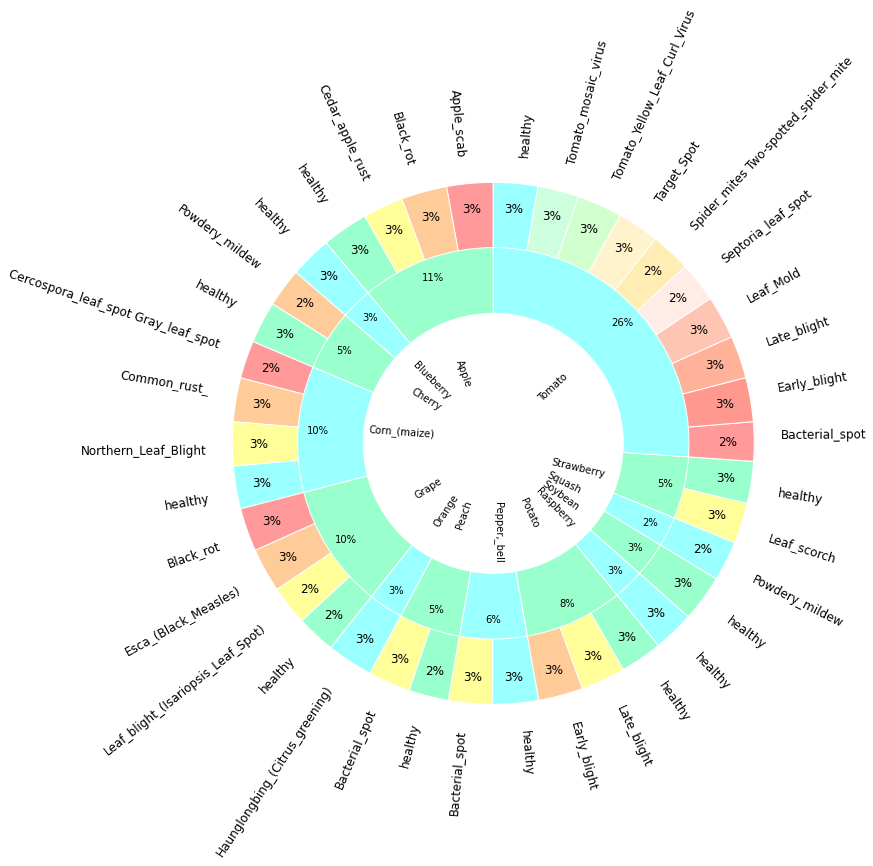

In [18]:
def  class_data_distribution(class_data_count,class_data_info):
    list_plant_mod= ['Cherry' if x == 'Cherry_(including_sour)' else x for x in list(class_data_count.Plant.unique())]


    pi_chart_color_0 = ['#99ffcc', '#99ffff', '#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff',]
    pi_chart_color_1 = ['#ff999a','#ffcb99', '#fffe99','#99ffcc',
  '#99ffff','#ffcb99', '#99ffcc','#ff999a','#ffcb99','#fffe99','#99ffff', '#ff999a','#ffcb99','#fffe99','#99ffcc',
  '#99ffff','#fffe99','#99ffcc','#fffe99','#99ffff','#ffcb99','#fffe99','#99ffcc','#99ffff','#99ffcc','#99ffff','#fffe99','#99ffcc',
  '#ff999a','#ff9990','#ffb299','#ffc5b3','#ffece6','#ffedb3','#fff3cd','#d1ffcd','#cdffdf','#99ffff']
 

    plt.pie(class_data_count.nb, labels=class_data_count.Category,  startangle=90,frame=True,radius=1,rotatelabels=True,colors=pi_chart_color_1,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90, textprops={'fontsize': 12})
    plt.pie(class_data_info.groupby(['Plant']).size(),labels=list_plant_mod,radius=0.75,startangle=90,labeldistance=0.3,rotatelabels=True,colors=pi_chart_color_0,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90, textprops={'fontsize': 10})
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
 
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12,12))
class_data_distribution(train_data_count,train_data_info)

# Validation Data 

In [19]:
img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val

Validation data distribution :


no. of images
Tomato___Late_blight                                          463
Tomato___healthy                                              481
Grape___healthy                                               423
Orange___Haunglongbing_(Citrus_greening)                      503
Soybean___healthy                                             505
Squash___Powdery_mildew                                       434
Potato___healthy                                              456
Corn_(maize)___Northern_Leaf_Blight                           477
Tomato___Early_blight                                         480
Tomato___Septoria_leaf_spot                                   436
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Strawberry___Leaf_scorch                                      444
Peach___healthy                                               432
Apple___Apple_scab                                            504
Tomato___Tomato_Yellow_Leaf_Curl_Virus                        490
Tomato___Bacterial_spot                                       425
Apple___Black_rot                                             497
Blueberry___healthy                                           454
Cherry_(including_sour)___Powdery_mildew                      421
Peach___Bacterial_spot                                        459
Apple___Cedar_apple_rust                                      440
Tomato___Target_Spot                                          457
Pepper,_bell___healthy                                        497
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                    430
Potato___Late_blight                                          485
Tomato___Tomato_mosaic_virus                                  448
Strawberry___healthy                                          456
Apple___healthy                                               502
Grape___Black_rot                                             472
Potato___Early_blight                                         485
Cherry_(including_sour)___healthy                             456
Corn_(maize)___Common_rust_                                   477
Grape___Esca_(Black_Measles)                                  480
Raspberry___healthy                                           445
Tomato___Leaf_Mold                                            470
Tomato___Spider_mites Two-spotted_spider_mite                 435
Pepper,_bell___Bacterial_spot                                 478
Corn_(maize)___healthy                                        465

<AxesSubplot:title={'center':'Validation data distribution '}, xlabel='Number of image', ylabel='Planet'>

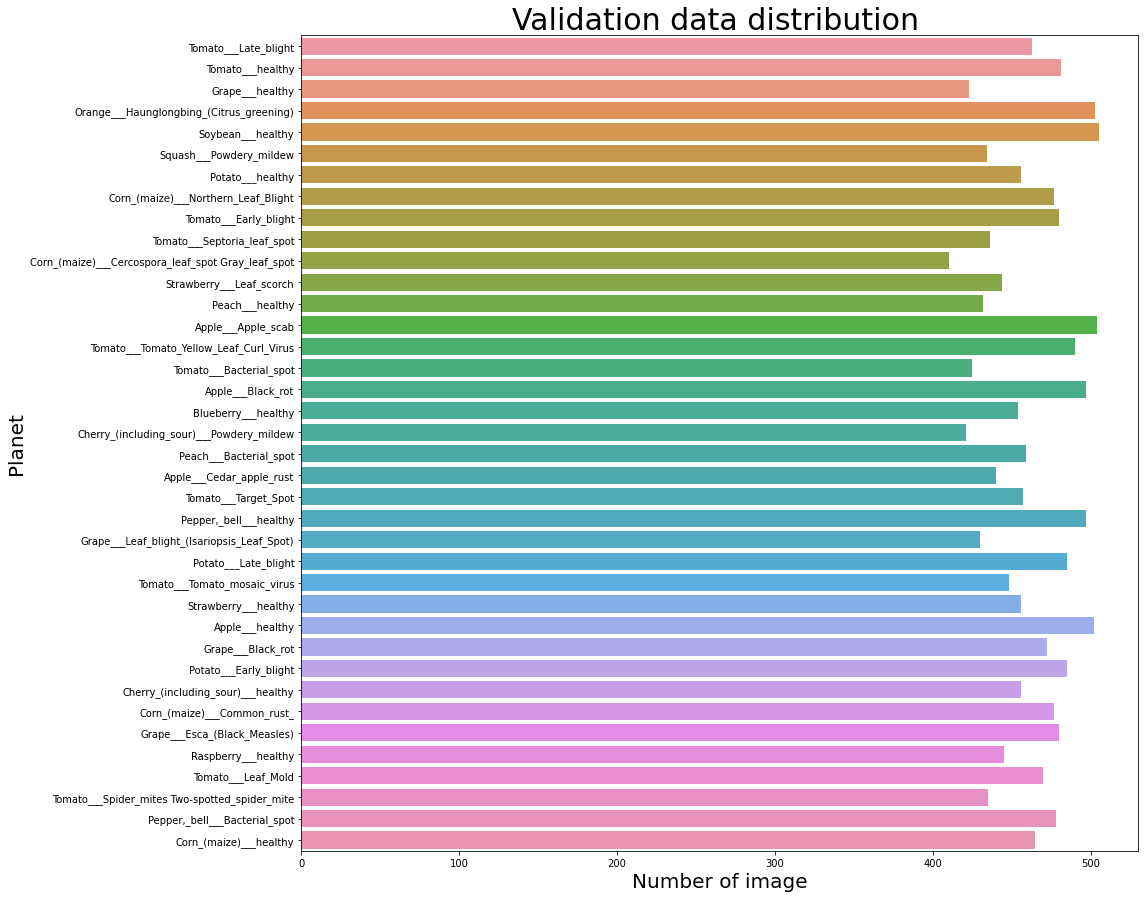

In [20]:
plt.figure(figsize=(15,15))
plt.title('Validation data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant',fontsize=20)

keys = list(nums_val.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_val.values())
sns.barplot(y=keys, x=vals)


In [21]:
# show number of images in validation data
number_val = 0
for value in nums_val.values():
    number_val += value
print("The number of images for validation : ",number_val)


The number of images for validation :  17572


# Show some plants with different diseases

In [46]:
# Function to show image
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

## Apple 

### Healthy

Label :Apple___healthy(3)
Label :Apple___healthy(3)
Label :Apple___healthy(3)
Label :Apple___healthy(3)
Label :Apple___healthy(3)
Label :Apple___healthy(3)


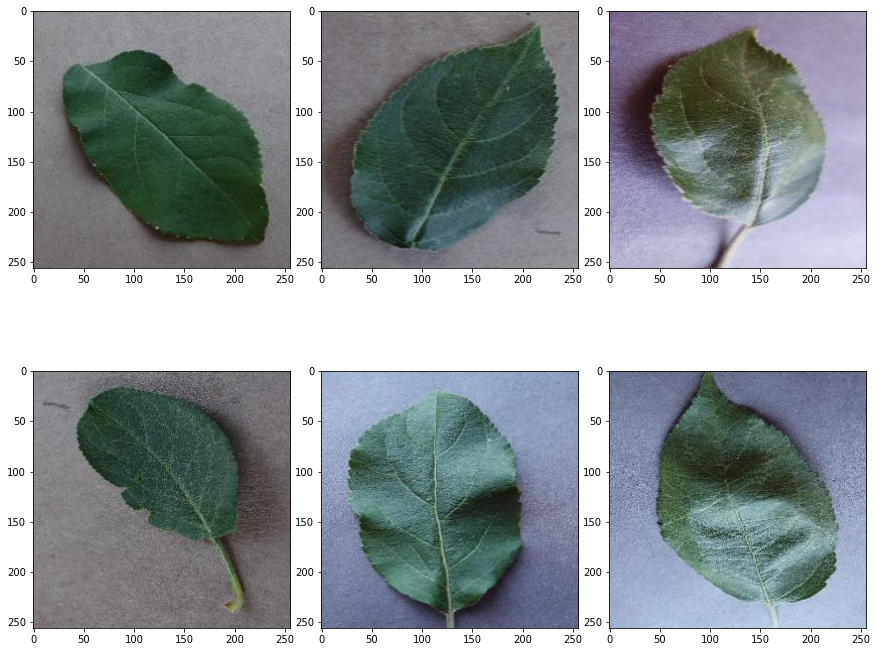

In [23]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[6000]))
axs[0,1].imshow(show_image(*train[6100]))
axs[1, 0].imshow(show_image(*train[6200]))
axs[1,1].imshow(show_image(*train[6350]))
axs[0,2].imshow(show_image(*train[6370]))
axs[1,2].imshow(show_image(*train[6400]))

### Scab

Label :Apple___Apple_scab(0)
Label :Apple___Apple_scab(0)
Label :Apple___Apple_scab(0)
Label :Apple___Apple_scab(0)
Label :Apple___Apple_scab(0)
Label :Apple___Apple_scab(0)


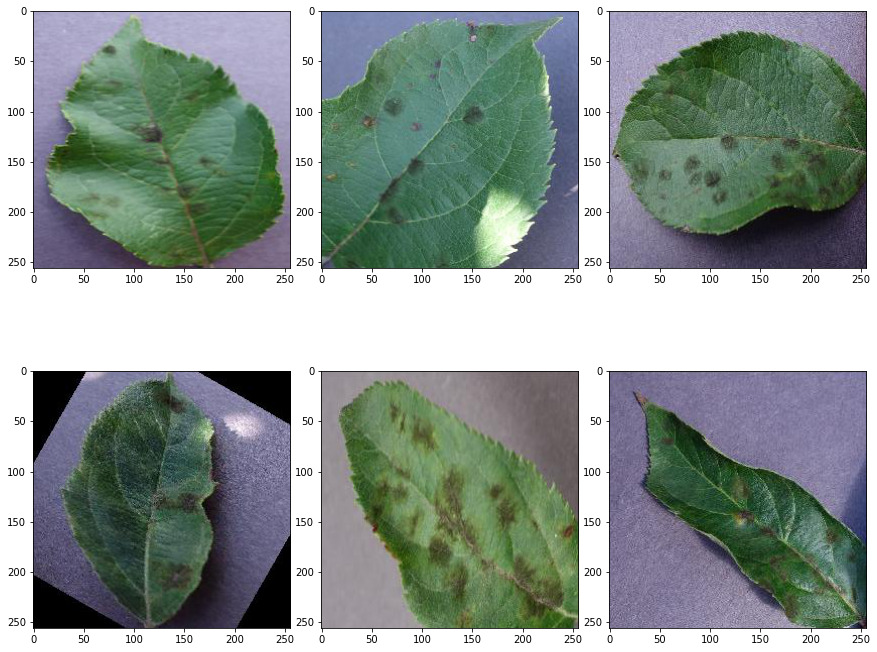

In [24]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[0]))
axs[0,1].imshow(show_image(*train[5]))
axs[1, 0].imshow(show_image(*train[18]))
axs[1,1].imshow(show_image(*train[20]))
axs[0,2].imshow(show_image(*train[55]))
axs[1,2].imshow(show_image(*train[255]))

### Black rot

Label :Apple___Black_rot(1)
Label :Apple___Black_rot(1)
Label :Apple___Black_rot(1)
Label :Apple___Black_rot(1)
Label :Apple___Black_rot(1)
Label :Apple___Black_rot(1)


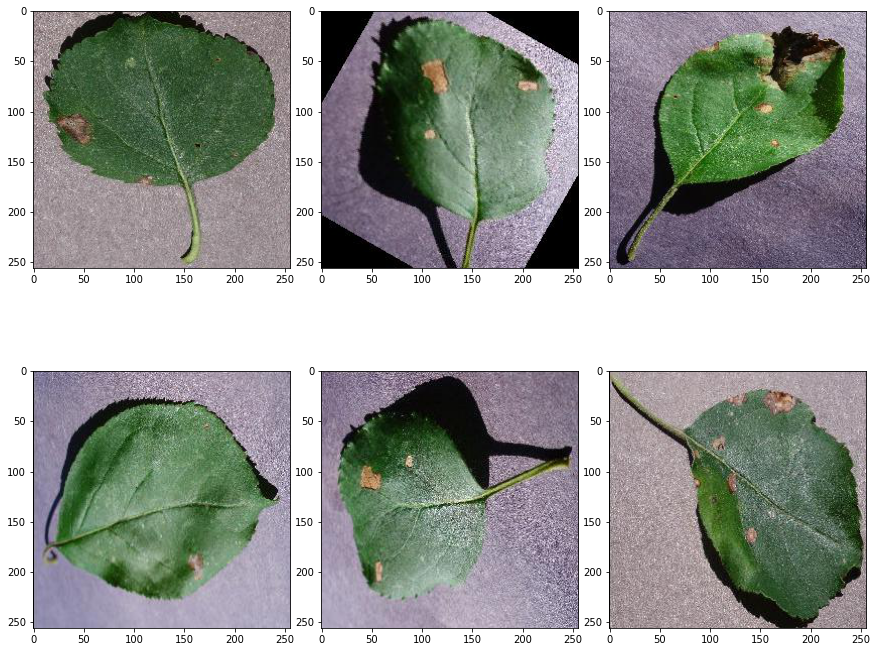

In [25]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[2020]))
axs[0,1].imshow(show_image(*train[2600]))
axs[1, 0].imshow(show_image(*train[3200]))
axs[1,1].imshow(show_image(*train[3220]))
axs[0,2].imshow(show_image(*train[3500]))
axs[1,2].imshow(show_image(*train[3550]))

### Cedar apple rust

Label :Apple___Cedar_apple_rust(2)
Label :Apple___Cedar_apple_rust(2)
Label :Apple___Cedar_apple_rust(2)
Label :Apple___Cedar_apple_rust(2)
Label :Apple___Cedar_apple_rust(2)
Label :Apple___Cedar_apple_rust(2)


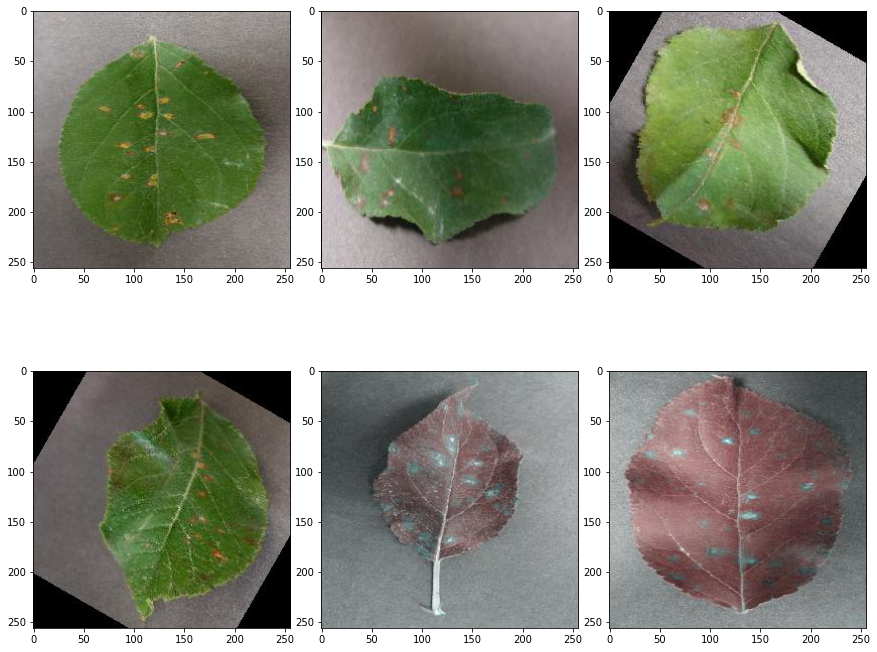

In [26]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[4200]))
axs[0,1].imshow(show_image(*train[4600]))
axs[1, 0].imshow(show_image(*train[5000]))
axs[1,1].imshow(show_image(*train[5110]))
axs[0,2].imshow(show_image(*train[5150]))
axs[1,2].imshow(show_image(*train[5400]))

## Tomato

### Healthy

Label :Tomato___healthy(37)
Label :Tomato___healthy(37)
Label :Tomato___healthy(37)
Label :Tomato___healthy(37)
Label :Tomato___healthy(37)
Label :Tomato___healthy(37)


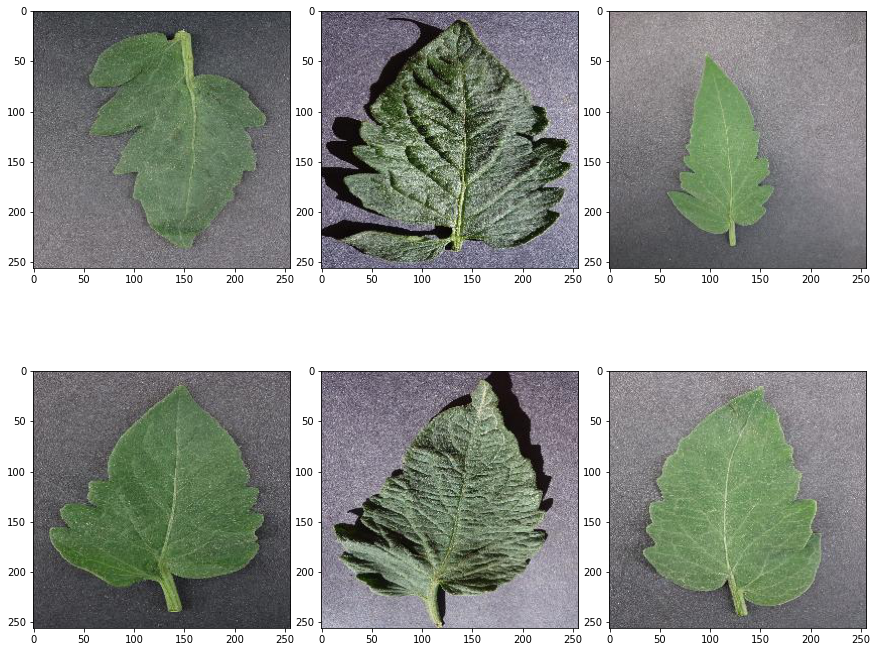

In [27]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[69000]))
axs[0,1].imshow(show_image(*train[69500]))
axs[1, 0].imshow(show_image(*train[69510]))
axs[1,1].imshow(show_image(*train[69600]))
axs[0,2].imshow(show_image(*train[69750]))
axs[1,2].imshow(show_image(*train[70000]))

### Becterial spot

Label :Tomato___Bacterial_spot(28)
Label :Tomato___Bacterial_spot(28)
Label :Tomato___Bacterial_spot(28)
Label :Tomato___Bacterial_spot(28)
Label :Tomato___Bacterial_spot(28)
Label :Tomato___Bacterial_spot(28)


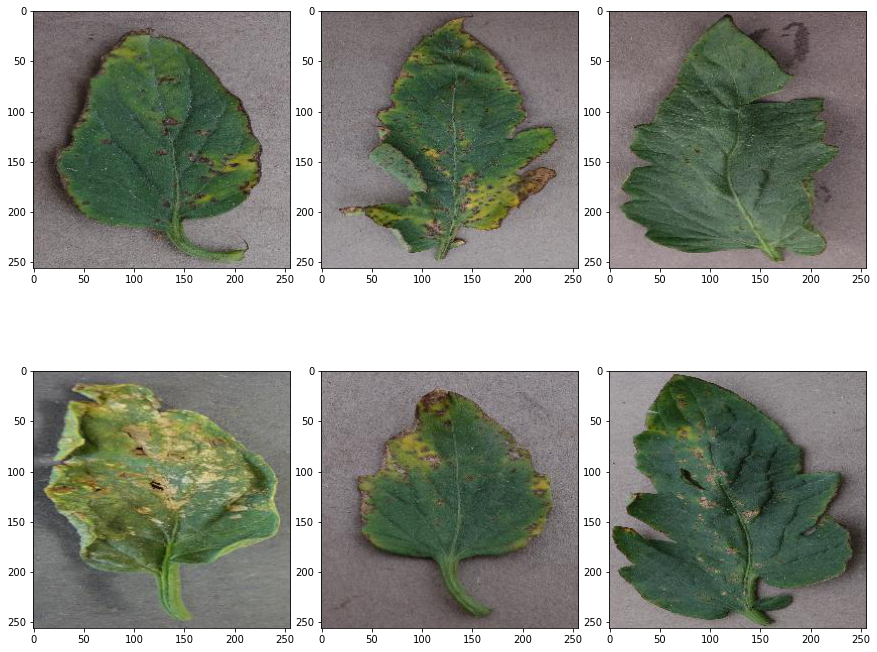

In [28]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[53000]))
axs[0,1].imshow(show_image(*train[53100]))
axs[1, 0].imshow(show_image(*train[53150]))
axs[1,1].imshow(show_image(*train[53225]))
axs[0,2].imshow(show_image(*train[53230]))
axs[1,2].imshow(show_image(*train[53260]))

### Early blight 

Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)


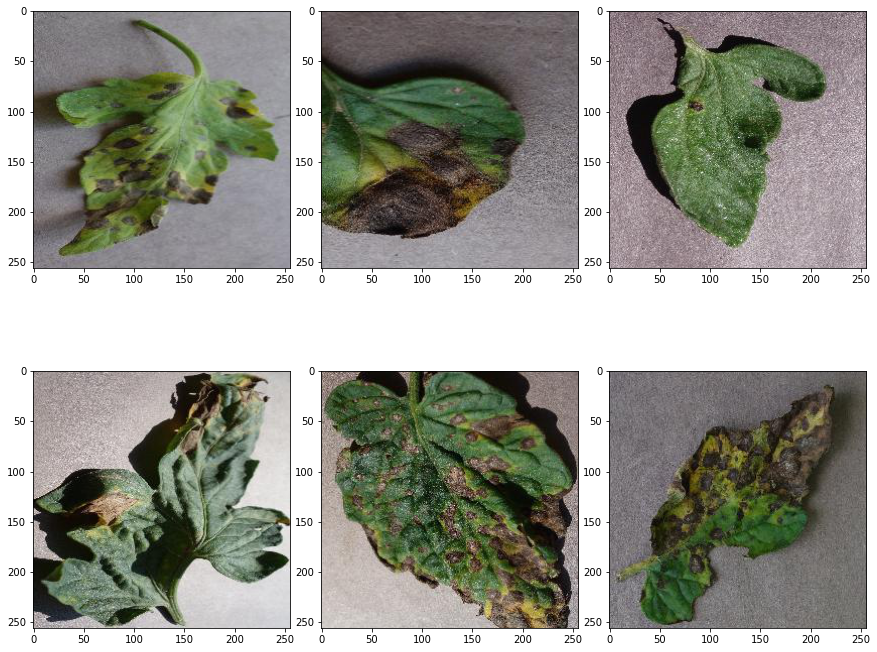

In [29]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[54000]))
axs[0,1].imshow(show_image(*train[54100]))
axs[1, 0].imshow(show_image(*train[54119]))
axs[1,1].imshow(show_image(*train[54150]))
axs[0,2].imshow(show_image(*train[54220]))
axs[1,2].imshow(show_image(*train[54223]))

### late blight

Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)
Label :Tomato___Early_blight(29)


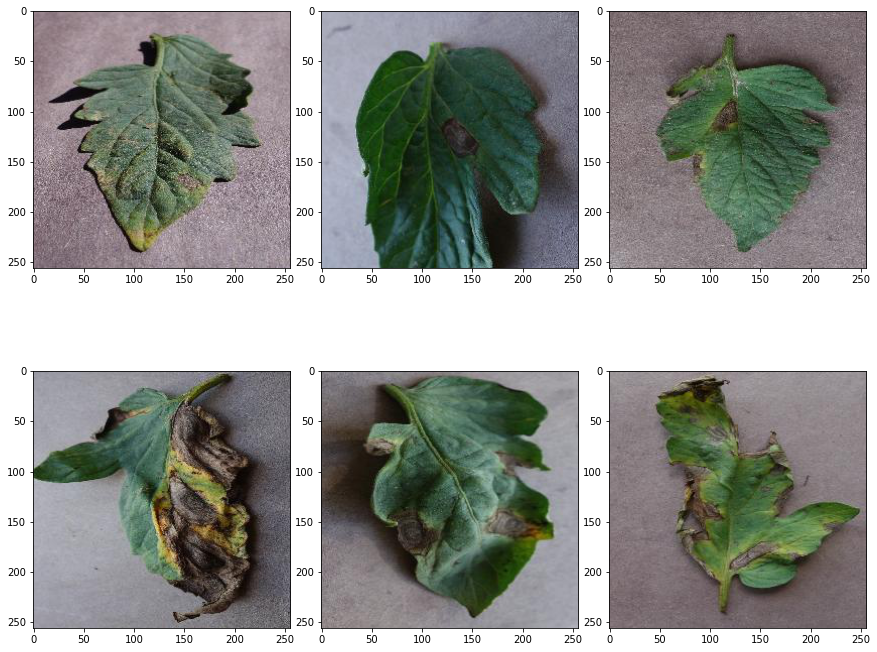

In [30]:
fig, axs = plt.subplots(2, 3,figsize=(12,10))
fig.tight_layout(pad=0)
axs[0,0].imshow(show_image(*train[54511]))
axs[0,1].imshow(show_image(*train[54550]))
axs[1, 0].imshow(show_image(*train[54560]))
axs[1,1].imshow(show_image(*train[54600]))
axs[0,2].imshow(show_image(*train[54610]))
axs[1,2].imshow(show_image(*train[54620]))

# Modeling

In [31]:
train_data =keras.utils.image_dataset_from_directory(train_dir ,
                                         image_size=(256, 256))
valid_data = keras.utils.image_dataset_from_directory(valid_dir,
                                        image_size=(256, 256))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [32]:
rescale = keras.layers.Rescaling(scale=1.0/255)

In [33]:
train_gen = train_data.map(lambda image,label:(rescale(image),label))
valid_gen  = valid_data.map(lambda image,label:(rescale(image),label))

Since the data is already augmented, there is no requirement of data engineering. Feature scaling is automatically done by image generators

## Model 1

In [34]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(256, activation='relu'))
model_1.add(keras.layers.Dense(38, activation='softmax'))

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [35]:
history = model_1.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


2197/2197 [==============================] - 155s 67ms/step - loss: 0.8314 - accuracy: 0.7545 - val_loss: 0.4309 - val_accuracy: 0.8697
Epoch 2/10
2197/2197 [==============================] - 144s 65ms/step - loss: 0.2282 - accuracy: 0.9256 - val_loss: 0.3843 - val_accuracy: 0.8738
Epoch 3/10
2197/2197 [==============================] - 146s 66ms/step - loss: 0.1274 - accuracy: 0.9581 - val_loss: 0.3111 - val_accuracy: 0.9023
Epoch 4/10
2197/2197 [==============================] - 144s 66ms/step - loss: 0.1105 - accuracy: 0.9641 - val_loss: 0.4290 - val_accuracy: 0.8758
Epoch 5/10
2197/2197 [==============================] - 144s 65ms/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 0.3368 - val_accuracy: 0.9039
Epoch 6/10
2197/2197 [==============================] - 144s 66ms/step - loss: 0.0687 - accuracy: 0.9779 - val_loss: 0.3587 - val_accuracy: 0.9006
Epoch 7/10
2197/2197 [==============================] - 144s 65ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.4157 - val

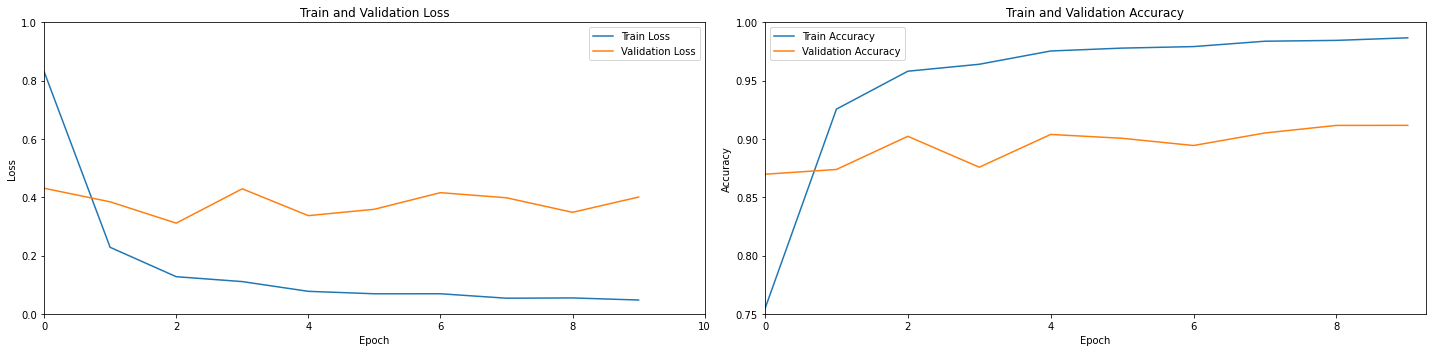

In [36]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [37]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_1.predict(x),1).numpy())

In [38]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [39]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.68 %
Test Accuracy   : 91.17 %
Precision Score : 91.17 %
Recall Score    : 91.17 %


## model 2

In [40]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)))
model_2.add(keras.layers.BatchNormalization())

model_2.add(keras.layers.Conv2D(32, 3, activation='relu'))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_2.add(keras.layers.MaxPooling2D())

model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(256, activation='relu'))

model_2.add(keras.layers.Dense(38, activation='softmax'))

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)      

In [41]:
history = model_2.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


2197/2197 [==============================] - 174s 79ms/step - loss: 0.8450 - accuracy: 0.7516 - val_loss: 0.3757 - val_accuracy: 0.8827
Epoch 2/10
2197/2197 [==============================] - 173s 79ms/step - loss: 0.2437 - accuracy: 0.9228 - val_loss: 0.4394 - val_accuracy: 0.8701
Epoch 3/10
2197/2197 [==============================] - 173s 79ms/step - loss: 0.1495 - accuracy: 0.9528 - val_loss: 0.4205 - val_accuracy: 0.8869
Epoch 4/10
2197/2197 [==============================] - 173s 78ms/step - loss: 0.1155 - accuracy: 0.9640 - val_loss: 5.0202 - val_accuracy: 0.4604
Epoch 5/10
2197/2197 [==============================] - 173s 79ms/step - loss: 0.0912 - accuracy: 0.9729 - val_loss: 0.6193 - val_accuracy: 0.8728
Epoch 6/10
2197/2197 [==============================] - 174s 79ms/step - loss: 0.0785 - accuracy: 0.9773 - val_loss: 0.7310 - val_accuracy: 0.8490
Epoch 7/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.0752 - accuracy: 0.9788 - val_loss: 0.4821 - val

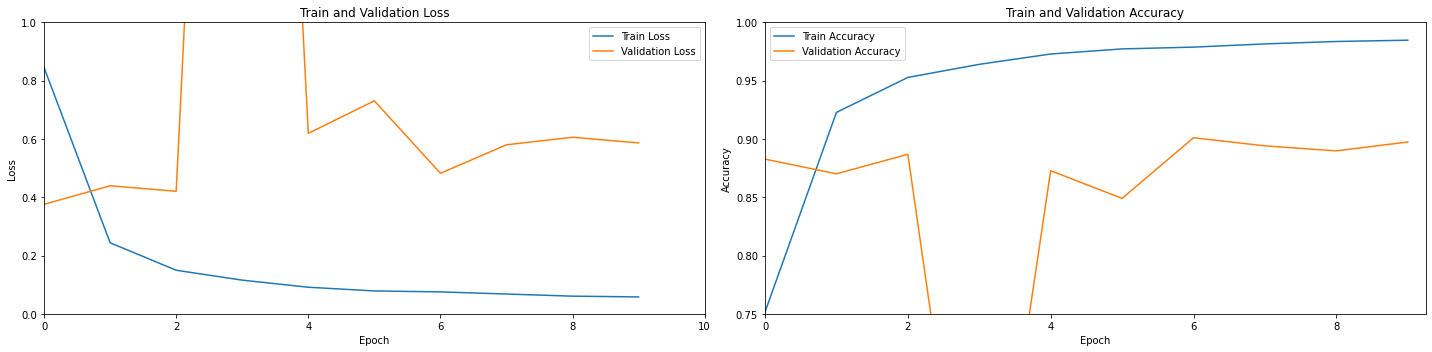

In [42]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [43]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_2.predict(x),1).numpy())

In [44]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [45]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.47 %
Test Accuracy   : 89.74 %
Precision Score : 89.74 %
Recall Score    : 89.74 %


## Model 3

In [47]:
model_3 = keras.Sequential()

model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model_3.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model_3.add(keras.layers.Flatten())

model_3.add(keras.layers.Dense(1568,activation="relu"))
model_3.add(keras.layers.Dropout(0.5))

model_3.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)      

In [48]:
history = model_3.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2197/2197 [==============================] - 195s 88ms/step - loss: 1.5785 - accuracy: 0.5389 - val_loss: 0.5532 - val_accuracy: 0.8228
Epoch 2/10
2197/2197 [==============================] - 192s 87ms/step - loss: 0.4625 - accuracy: 0.8529 - val_loss: 0.2966 - val_accuracy: 0.9035
Epoch 3/10
2197/2197 [==============================] - 191s 87ms/step - loss: 0.2761 - accuracy: 0.9106 - val_loss: 0.2145 - val_accuracy: 0.9272
Epoch 4/10
2197/2197 [==============================] - 192s 87ms/step - loss: 0.1847 - accuracy: 0.9384 - val_loss: 0.2012 - val_accuracy: 0.9331
Epoch 5/10
2197/2197 [==============================] - 192s 87ms/step - loss: 0.1342 - accuracy: 0.9547 - val_loss: 0.1506 - val_accuracy: 0.9515
Epoch 6/10
2197/2197 [==============================] - 193s 88ms/step - loss: 0.1038 - accuracy: 0.9650 - val_loss: 0.1565 - val_accuracy: 0.9500
Epoch 7/10
2197/2197 [==============================] - 193s 88ms/step - loss: 0.0857 - accuracy: 0.9709 - val_loss: 0

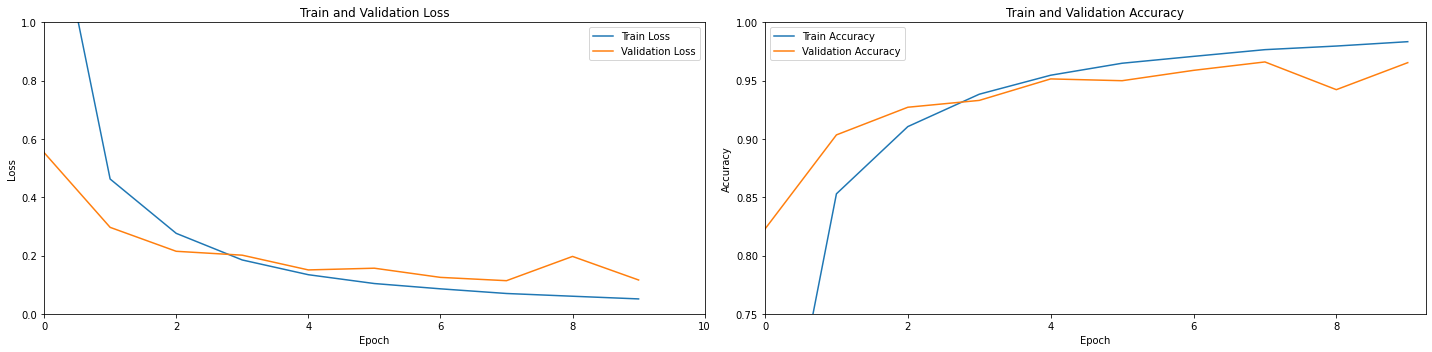

In [49]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [50]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_3.predict(x),1).numpy())

In [51]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [52]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.35 %
Test Accuracy   : 96.55 %
Precision Score : 96.55 %
Recall Score    : 96.55 %


<Figure size 1440x360 with 0 Axes>

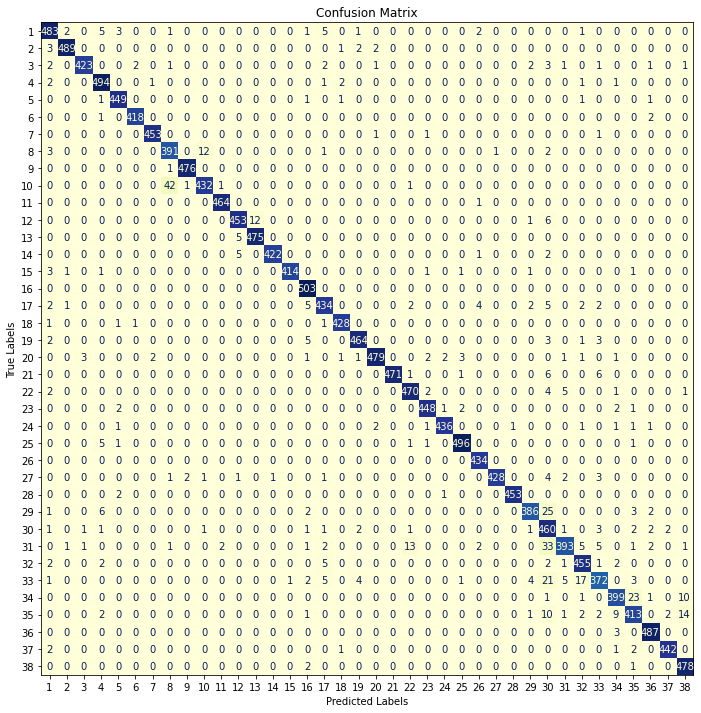

In [53]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Save and load the model

In [55]:
from tensorflow.keras.models import load_model
m3_saved = model_3.save("model_3.h5")

In [ ]:
#model3 = keras.models.load_model("model_3.h5")
#model3.summary()

### Test the model with test data

We only have 33 images in test data, so let's check the model on all images


In [ ]:
Li = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
      'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
      'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
      'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
      'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
      'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
      'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
      'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
      'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# predicting an image
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="/content/new-plant-diseases-dataset/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,10):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model_3.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = Li[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()